### Use this script to curate our dataset for training. The original dataset used is HMDB51

In [15]:
import os, sys
from tqdm import tqdm
import random
import shutil
from collections import defaultdict

In [9]:
# set your working directory
workdir = ""
hmdb_path = os.path.join(workdir, 'HMDB51')

We want a 50-50 split between positive and negative samples


In [12]:
# get all classes in HMDB51 dataset
if workdir:
    os.chdir(workdir)
    print(os.getcwd())
    print()

    random.seed(0)
    print(os.listdir(hmdb_path))

C:\Users\INIMFONAKPABIO\Desktop\Current classes\grad_firstyear_spring_semester\CSCE 636\Project

['brush_hair', 'cartwheel', 'catch', 'chew', 'clap', 'climb', 'climb_stairs', 'dive', 'draw_sword', 'dribble', 'drink', 'eat', 'fall_floor', 'fencing', 'flic_flac', 'golf', 'handstand', 'hit', 'hug', 'jump', 'kick', 'kick_ball', 'kiss', 'laugh', 'pick', 'pour', 'pullup', 'punch', 'push', 'pushup', 'ride_bike', 'ride_horse', 'run', 'shake_hands', 'shoot_ball', 'shoot_bow', 'shoot_gun', 'sit', 'situp', 'smile', 'smoke', 'somersault', 'stand', 'swing_baseball', 'sword', 'sword_exercise', 'talk', 'throw', 'turn', 'walk', 'wave']


# 

In [13]:
# select desired number of videos from each class
# These videos will comprise the dataset

if workdir:
    train_files = []
    for dname in os.listdir(hmdb_path):
        vid_id = defaultdict(int)
        class_vids = []
        for name in os.listdir(os.path.join(hmdb_path, dname)):
            if vid_id[name[:name.find("_")]]:
                continue
            else:
                vid_id[name[:name.find("_")]] = 1
                class_vids.append(name)

        class_vid_all = [os.path.join(hmdb_path, os.path.join(dname, vid)) for vid in class_vids]
        sampled_vids = random.sample(class_vid_all, min(random.randint(9,10), len(class_vid_all)))
        train_files += sampled_vids

In [22]:
if workdir:
    len(train_files)

In [8]:
# copy files to desired location
copy_to = ""

if copy_to:
    for file in tqdm(train_files):
        temp = shutil.copy2(file, copy_to)

100%|████████████████████████████████████████████████████████████████████████████████| 484/484 [00:39<00:00, 12.29it/s]


In [19]:
# please install 'keras_video' first then uncomment and run
# from keras_video import VideoFrameGenerator
# from keras_video import utils
# from keras.preprocessing.image import ImageDataGenerator

In [20]:
# Video data generator. This works similar to an image data generator. 
# We can also use this for all our preprocessing.

dataset_path = ""

if ('keras_video' in sys.modules) and dataset_path:
    vid_gen = VideoFrameGenerator(
        glob_pattern=dataset_path+"/{classname}/*",
        nb_frames=5,
        split_val=.15, 
        shuffle=True,
        batch_size=22,
        target_shape=(224, 224),
        nb_channel=3,
        transformation=ImageDataGenerator(rescale=1./255),
        use_frame_cache=False)

class watering_plants, validation count: 72, train count: 412
class z_miscellaneous, validation count: 72, train count: 412
Total data: 2 classes for 824 files for train


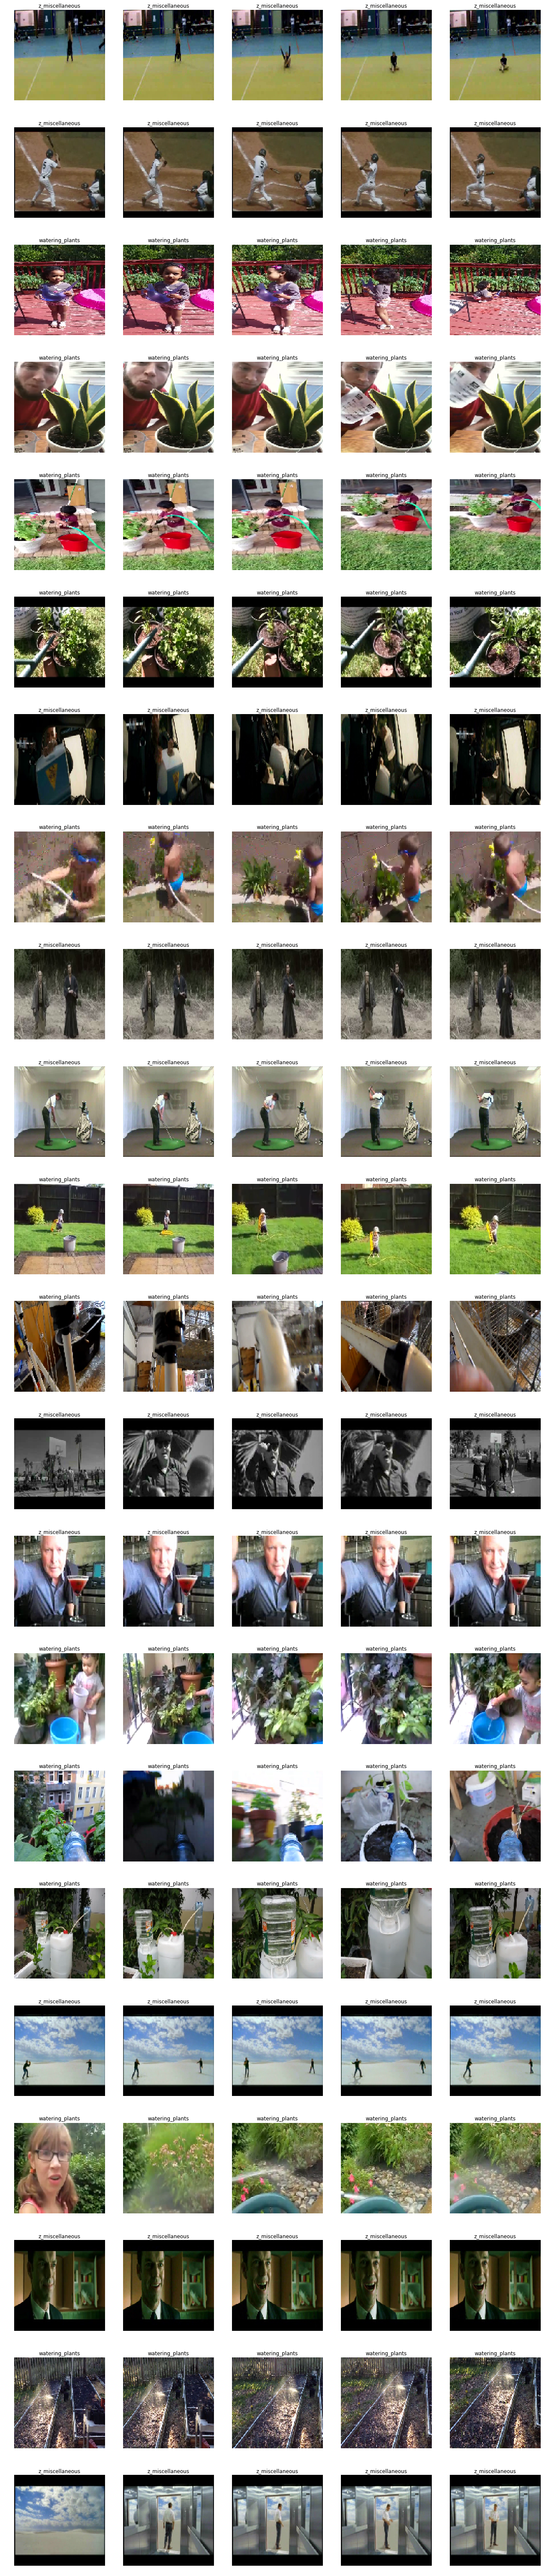

In [21]:
# use this for visualization

if ('keras_video' in sys.modules) and dataset_path:
    utils.show_sample(vid_gen, random=True)